In [ ]:
'''
Congratulations! The Acme Axegrinders, which you own, are the regular 
season champions of the National Squishyball League (NSL). Your team 
will now play a championship series against the Boondocks Barbarians, 
which had the second-best regular season record. You feel good about 
Acme’s chances in the series because Acme won exactly 60 percent of 
the hundreds of games it played against Boondocks this season. (The 
NSL has an incredibly long regular season.) The NSL has two special 
rules for the playoffs:

1.  The owner of the top-seeded team (i.e., you) gets to select the 
    length of the championship series in advance of the first game, 
    so you could decide to play a single game, a best two out of three 
    series, a three out of five series, etc., all the way up to a 50 
    out of 99 series.

2.  The owner of the winning team gets $1 million minus $10,000 for 
    each of the victories required to win the series, regardless of 
    how many games the series lasts in total. Thus, if the top-seeded 
    team’s owner selects a single-game championship, the winning owner 
    will collect $990,000. If he or she selects a 4 out of 7 series, 
    the winning team’s owner will collect $960,000. The owner of the 
    losing team gets nothing.
    
Since Acme has a 60 percent chance of winning any individual game against 
Boondocks, Rule 1 encourages you to opt for a very long series to improve 
Acme’s chances of winning the series. But Rule 2 means that a long series 
will mean less winnings for you if Acme does take the series.

How long a series should you select in order to maximize your expected 
winnings? And how much money do you expect to win?
'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def estimate_expected_value(g, n):
    """estimates the expected winnings of a best-of-g series
    by simulating a best-of-g series n times
    """
    win_p = (np.sum(np.sum(np.random.random([n, g]) < .6, axis=1) >= g//2 + 1))/float(n)
    return win_p * (1000000 - 10000 * (g//2 + 1))

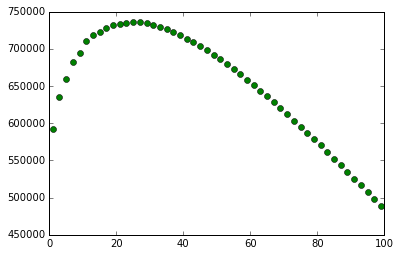

In [3]:
# Let's use the estimate_expected_value function to get a rough
# idea of which series length is optimal:

series_lengths = range(1, 100, 2)
exp_values = [estimate_expected_value(g, 100000) for g in series_lengths]

plt.plot(series_lengths, exp_values, 'go')

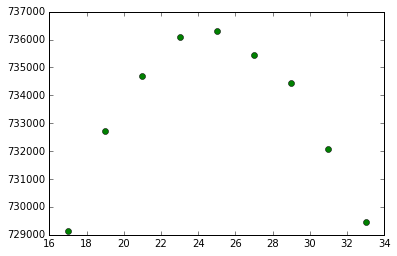

In [4]:
# It looks like the optimal series length is between 17 and 33.
# Let's get more accurate estimates for these series:

exp_values_17_thru_33 = [estimate_expected_value(g, 5000000) for g in range(17, 34, 2)]
plt.plot(range(17, 34, 2), exp_values_17_thru_33, 'go')

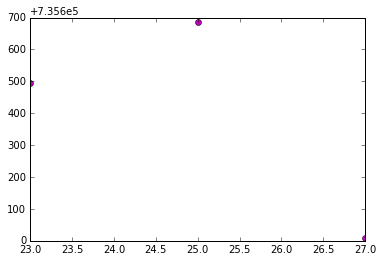

In [5]:
# Alright! It looks like a best-of-25 series has the highest
# expected value. Let's only focus on best-of-23, -25, and -27
# series and try to get even more accurate estimates:

exp_values_23_thru_27 = [estimate_expected_value(g, 25000000) for g in range(23, 28, 2)]
plt.plot(range(23, 28, 2), exp_values_23_thru_27, 'mo')

In [6]:
# Best-of-25 it is! Let's get one final estimate of the expected winnings
# for a best-of-25 series (by simulating it 250 million times...):

exp_vals = []
for i in range(5):
    exp_vals.append(estimate_expected_value(25, 50000000))

print np.mean(exp_vals)

736217.04804
